In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_nm=df.loc[df.State=="NM"]
df_nm=df_nm.drop(columns=["FIPS"])
df_nm

,State,County,MapDate,DSCI,Year
42744,NM,Catron County,2000-01-04,98,2000
42745,NM,Catron County,2000-01-11,100,2000
42746,NM,Catron County,2000-01-18,100,2000
42747,NM,Catron County,2000-01-25,100,2000
42748,NM,Catron County,2000-02-01,100,2000
...,...,...,...,...,...
50411,NM,San Juan County,2020-12-01,500,2020
50412,NM,San Juan County,2020-12-08,500,2020
50413,NM,San Juan County,2020-12-15,478,2020
50414,NM,San Juan County,2020-12-22,478,2020


In [3]:
df_nm_groups=df_nm.groupby(["State","Year"]).mean()

In [4]:
df_nm_groups.reset_index()

,State,Year,DSCI
0,NM,2000,98.403846
1,NM,2001,11.703297
2,NM,2002,282.059299
3,NM,2003,299.662088
4,NM,2004,324.585165
5,NM,2005,149.587912
6,NM,2006,221.991758
7,NM,2007,78.137363
8,NM,2008,38.479784
9,NM,2009,48.736264


In [5]:
df_nm_groups=df_nm_groups.groupby(["State","Year"]).mean().reset_index()
df_nm_groups

,State,Year,DSCI
0,NM,2000,98.403846
1,NM,2001,11.703297
2,NM,2002,282.059299
3,NM,2003,299.662088
4,NM,2004,324.585165
5,NM,2005,149.587912
6,NM,2006,221.991758
7,NM,2007,78.137363
8,NM,2008,38.479784
9,NM,2009,48.736264


<AxesSubplot:xlabel='Year'>

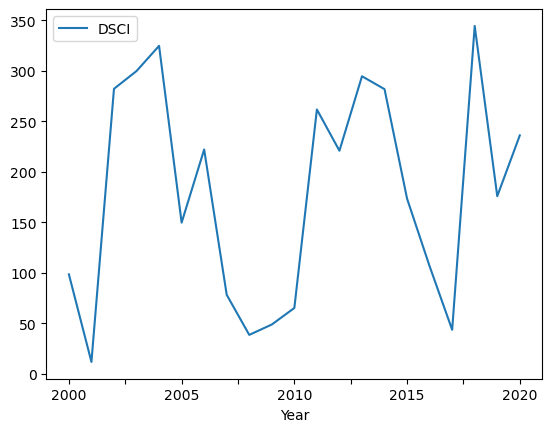

In [6]:
df_nm_groups.plot(x="Year")

In [7]:
df_nm_county_groups=df_nm.groupby(["County","Year"]).mean().reset_index()
df_nm_county_groups

,County,Year,DSCI
0,Catron County,2000,100.865385
1,Catron County,2001,9.346154
2,Catron County,2002,241.188679
3,Catron County,2003,245.846154
4,Catron County,2004,323.038462
...,...,...,...
142,San Juan County,2016,88.211538
143,San Juan County,2017,28.423077
144,San Juan County,2018,447.173077
145,San Juan County,2019,277.150943


In [8]:
county_list=df_nm["County"].unique()
county_list

array(['Catron County', 'Cibola County', 'Grant County', 'Hidalgo County',
       'McKinley County', 'Rio Arriba County', 'San Juan County'],
      dtype=object)

Catron County
Cibola County
Grant County
Hidalgo County
McKinley County
Rio Arriba County
San Juan County


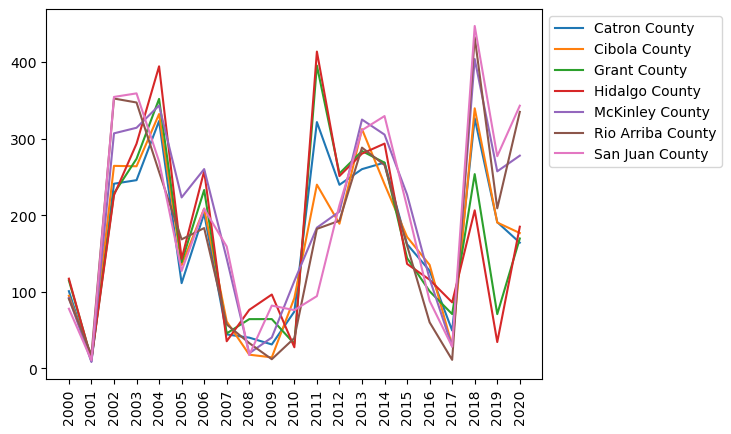

In [9]:
for county in county_list:
    print(county)
    df_nm_map=df_nm_county_groups.loc[df_nm_county_groups["County"]==county]
    df_nm_map=df_nm_map.drop(columns=["County"])
    df_nm_map=df_nm_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_nm_map["Year"].to_list()
    y2=df_nm_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()